# Introduction

Now that all data gathering is done (see /data) and all sentiment analysis is complete (see /sentiment_analysis and /data for method and results) it is time to take a look at which information was extracted from the tweets. First we will take a look at the naive average sentiment for every day of our chosen interval but as we do not expect this to be too informative we will do some data manipulation and see if we can find out some meaningful trends in the sentiment of the public's tweets during the Corona virus outbreak. 

# Loading in the data and naive approach 

Let's first take a look at the average sentiment for each day from our sampling period and see if we can detect anything resembling any of the curves typically linked to the outbreak. For this we will use the sentiments_per_day.csv file in the /data folder. 

In [2]:
import pandas as pd 
import numpy as np 
import os
from os import path
import matplotlib.pyplot as plt

First we set the /data directory as our work space

In [3]:
#check if data directory is in its expected place
if not path.isdir(os.getcwd()+'/data'):
    #if not in this directory try parent directory
    original = path.dirname(os.getcwd())
    os.chdir(original)
    parent = os.getcwd()
    if not path.isdir(parent+'/data'):
        raise Exception("No data directory was found at %s or %s"%(original, parent))
    else:
        os.chdir(os.getcwd()+'/data')

else:
    os.chdir(os.getcwd()+'/data')

Now we will read the data into a Pandas dataframe and make our first visualisation

,date,sentiment
0,2020-03-11,0.043060
1,2020-03-12,0.029311
2,2020-03-13,0.101118
3,2020-03-14,0.114129
4,2020-03-15,0.085223


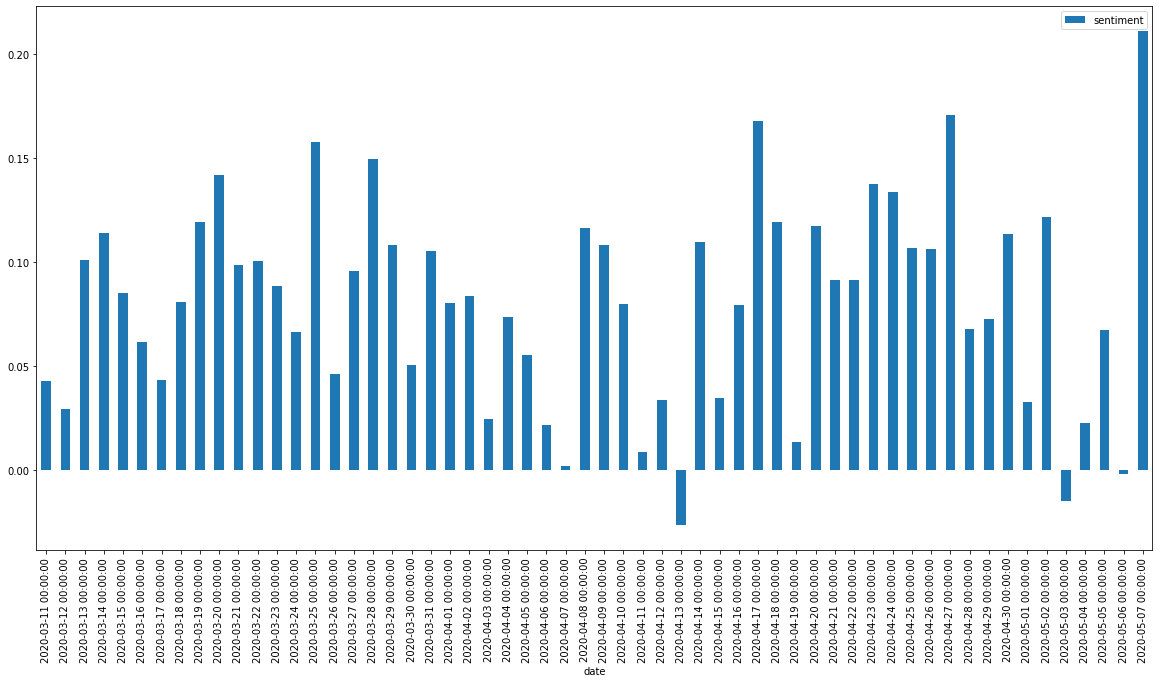

In [4]:
df = pd.read_csv('sentiments_per_day.csv', names = ["date", "sentiment"])
df["date"] = df["date"].apply(lambda x:str(x))
#change to stupid american format cause that's what pandas employs standardly 
df["date"] = df["date"].apply(lambda x:x[4:6]+"/"+x[6::]+"/"+x[:4:])
df["date"] = pd.to_datetime(df["date"])
df.plot.bar(x="date", y="sentiment", figsize=(20,10))
df.head(5)

As you can see this plot seems very irregular which would be slightly worrying but we kind of expected this since the average sentiment is just too much of an aggregation of the data leading to information loss, although with enough imagination you could already notice in this plot that around the middle of the plot (the first weeks of April) the sentiment values seem to be lower.

# Handling the data
Now that the dataframe has been set up correctly we will transform the data a little and see if we can get a more meaningful result.
## Normalisation
Before performing the naive visualisation in the last section we already had a suspicion that this would not show anything useful. This is because the sentiment value in itself is not really that interesting. A more interesting measure that we assume will be more closely correlated to the status of the outbreak would be the deviation of the daily sentiment value from the ground neutral sentiment concerning this topic. To investigate this we could make the assumption that the mean of all sentiment values across all days would approach this ground sentiment and then we could simply look at the deviation from this mean. Since  Let's give this a try:

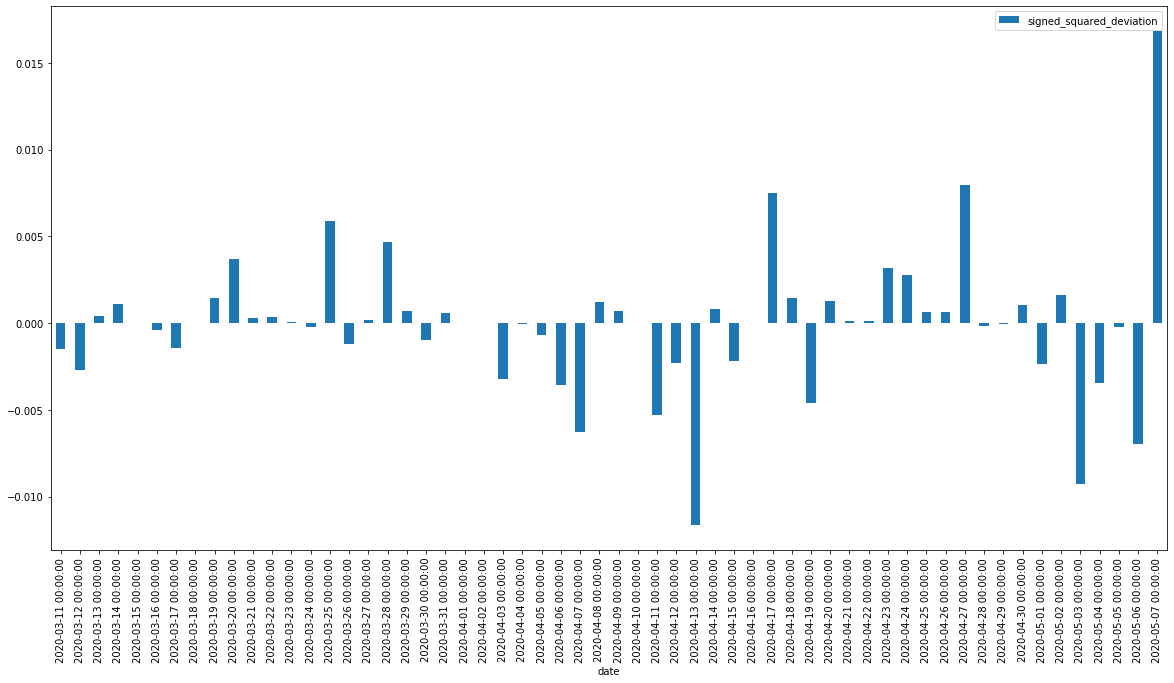

In [5]:
df["deviation"] = (df["sentiment"] - df["sentiment"].mean())
df["sign_deviation"] = np.sign(df["deviation"])
df["signed_squared_deviation"] = df["sign_deviation"]*df["deviation"]**2
df.plot.bar(x="date", y="signed_squared_deviation", figsize=(20,10))
df.head(5)

#save this data
df.to_csv("squared_deviation.csv")

We took the squared deviation from the mean instead of the linear deviation because we are interested in the days where people had strong feelings about the crisis (squaring emphasises larger deviations from the mean) and multiplied by the sign of the linear deviation to keep the positive/negative sentiment dimensionality. As we can see the graph has already become less noisy and there are now clearly days visible on which the sentiment was more strongly expressed than expected. We can now clearly see strongly negative sentiments around the middle of th graph (3rd of April - 15th of April) which a quick Google query will confirm to equate to the peak of the number of daily deaths of the epidemic in Belgium. This is what we expected since this epidemic statistic would be expected to most strongly influence the sentiment of people. 

# Conclusion
The result above, using only the crude average daily sentiment values, seems to confirm our suspicion that it is possible to gain information about the peak of the epidemic using twitter data. However to confidently formulate a definitive answer we will reiterate over the previous steps with some less crude sentiment aggregations. This will be done in the following notebook. 